C:\Users\jenit\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - loss: 0.0925 - val_loss: 0.0197
Epoch 2/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0252 - val_loss: 0.0176
Epoch 3/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0225 - val_loss: 0.0169
Epoch 4/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0221 - val_loss: 0.0182
Epoch 5/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0216 - val_loss: 0.0151
Epoch 6/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0204 - val_loss: 0.0150
Epoch 7/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0200 - val_loss: 0.0141
Epoch 8/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0169 - val_loss: 0.0135
Epoch 9/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0154 - val_loss: 0.0131
Epoch 10/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0194 - val_loss: 0.0126
Epoch 11/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0154 - val_loss: 0.0120
Epoch 12/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/ste

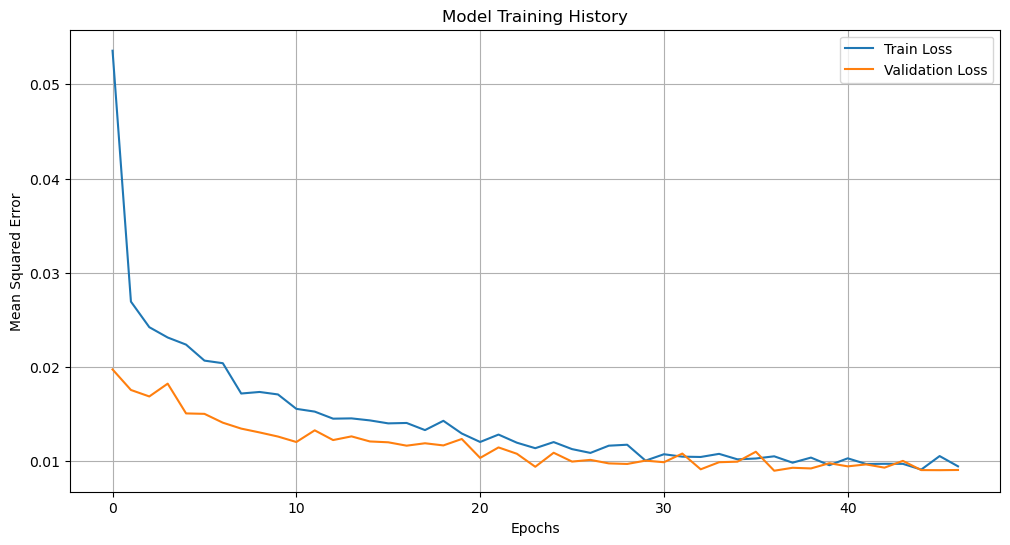

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Train RMSE: 0.354
Test RMSE: 0.379


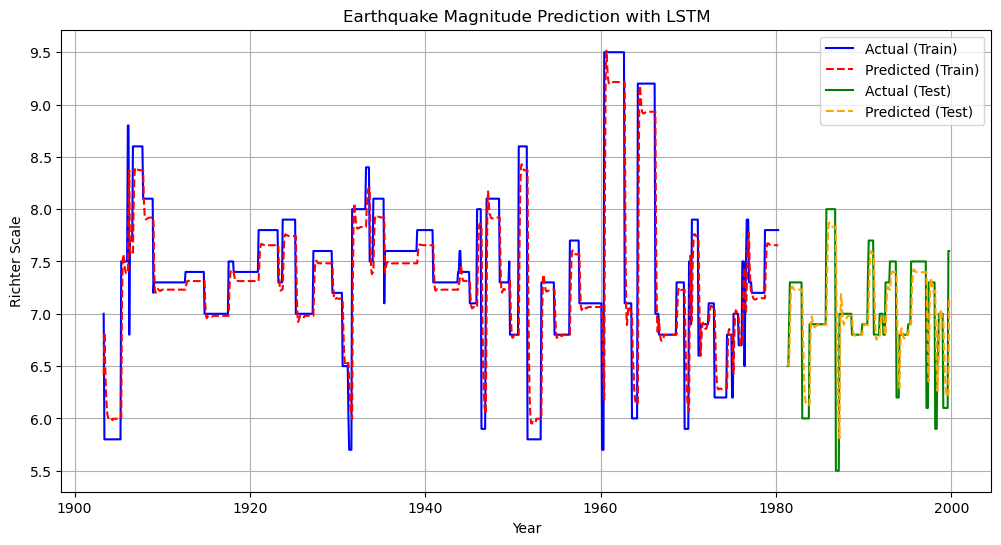

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


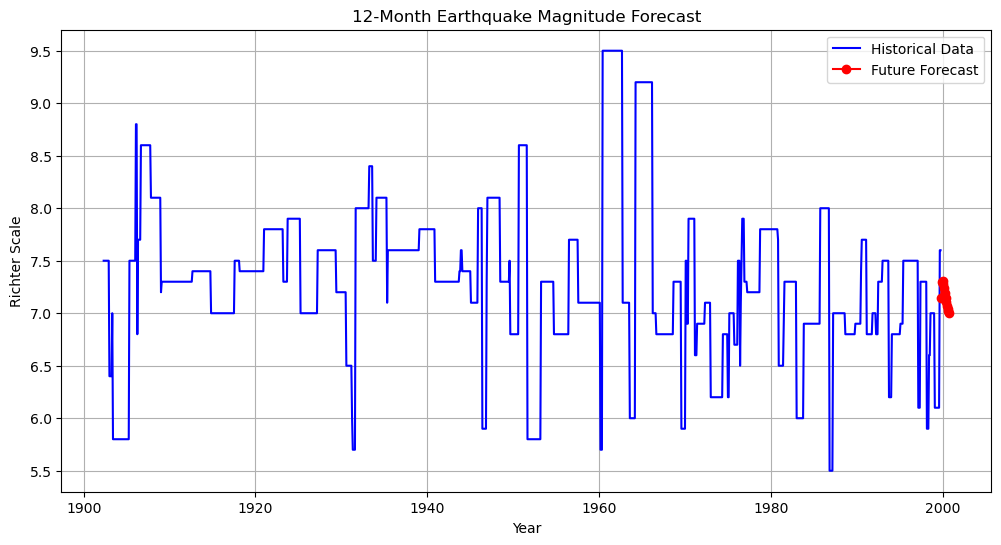


12-Month Future Forecast:
1999-10: 7.15
1999-11: 7.29
1999-12: 7.31
2000-01: 7.28
2000-02: 7.24
2000-03: 7.19
2000-04: 7.14
2000-05: 7.10
2000-06: 7.07
2000-07: 7.04
2000-08: 7.02
2000-09: 7.00


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from datetime import datetime

# Load and preprocess the data
def load_data():
    # Load the dataset
    df = pd.read_csv('earthquakes.csv')
    
    # Convert month names to numbers
    month_map = {
        'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
        'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12
    }
    df['month'] = df['month'].map(month_map)
    
    # Create datetime index and sort
    df['date'] = pd.to_datetime(df[['year', 'month', 'day']])
    df.set_index('date', inplace=True)
    df.sort_index(inplace=True)
    
    # Resample to monthly frequency (max magnitude per month)
    ts = df['richter'].resample('M').max().ffill()
    return ts

# Create supervised learning dataset
def create_dataset(data, n_steps):
    X, y = [], []
    for i in range(len(data) - n_steps):
        X.append(data[i:i + n_steps])
        y.append(data[i + n_steps])
    return np.array(X), np.array(y)

# Prepare the data
ts = load_data()

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
ts_scaled = scaler.fit_transform(ts.values.reshape(-1, 1))

# Set parameters
n_steps = 12  # Using 12 months (1 year) as lookback window
test_size = 0.2  # 20% for testing
n_features = 1  # Univariate time series

# Split into train/test
split_idx = int(len(ts_scaled) * (1 - test_size))
train, test = ts_scaled[:split_idx], ts_scaled[split_idx:]

# Create supervised datasets
X_train, y_train = create_dataset(train, n_steps)
X_test, y_test = create_dataset(test, n_steps)

# Reshape for LSTM [samples, timesteps, features]
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], n_features))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], n_features))

# Build LSTM model
model = Sequential([
    LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)),
    Dropout(0.2),
    LSTM(50, activation='relu'),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

# Train the model
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(
    X_train, y_train, 
    epochs=100, 
    batch_size=12,
    validation_data=(X_test, y_test),
    callbacks=[early_stop],
    verbose=1
)

# Plot training history
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Training History')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)
plt.show()

# Make predictions
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

# Inverse transform predictions
train_pred = scaler.inverse_transform(train_pred)
y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
test_pred = scaler.inverse_transform(test_pred)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate RMSE
train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))
print(f'Train RMSE: {train_rmse:.3f}')
print(f'Test RMSE: {test_rmse:.3f}')

# Plot predictions vs actual
plt.figure(figsize=(12, 6))
plt.plot(ts.index[n_steps:split_idx], y_train, label='Actual (Train)', color='blue')
plt.plot(ts.index[n_steps:split_idx], train_pred, label='Predicted (Train)', color='red', linestyle='--')
plt.plot(ts.index[split_idx+n_steps:], y_test, label='Actual (Test)', color='green')
plt.plot(ts.index[split_idx+n_steps:], test_pred, label='Predicted (Test)', color='orange', linestyle='--')
plt.title('Earthquake Magnitude Prediction with LSTM')
plt.xlabel('Year')
plt.ylabel('Richter Scale')
plt.legend()
plt.grid(True)
plt.show()

# Forecast future values
def forecast_future(model, last_sequence, n_steps, n_future):
    future_predictions = []
    current_sequence = last_sequence.copy()
    
    for _ in range(n_future):
        # Get prediction for next step
        next_pred = model.predict(current_sequence.reshape(1, n_steps, n_features))
        future_predictions.append(next_pred[0, 0])
        
        # Update sequence
        current_sequence = np.roll(current_sequence, -1)
        current_sequence[-1] = next_pred
        
    return np.array(future_predictions)

# Get last sequence from test data
last_sequence = X_test[-1]

# Forecast next 12 months
n_future = 12
future_pred_scaled = forecast_future(model, last_sequence, n_steps, n_future)
future_pred = scaler.inverse_transform(future_pred_scaled.reshape(-1, 1))

# Create future dates
last_date = ts.index[-1]
future_dates = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=n_future, freq='M')

# Plot future forecast
plt.figure(figsize=(12, 6))
plt.plot(ts.index, ts, label='Historical Data', color='blue')
plt.plot(future_dates, future_pred, label='Future Forecast', color='red', marker='o')
plt.title('12-Month Earthquake Magnitude Forecast')
plt.xlabel('Year')
plt.ylabel('Richter Scale')
plt.legend()
plt.grid(True)
plt.show()

print("\n12-Month Future Forecast:")
for date, pred in zip(future_dates, future_pred):
    print(f"{date.strftime('%Y-%m')}: {pred[0]:.2f}")